In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('/Users/burakfindikli/Documents/Mackolik/data/2018-2019_tsl.csv',index_col = False)
df2=pd.read_csv('/Users/burakfindikli/Documents/Mackolik/data/2017-2018_tsl.csv',index_col = False)

In [19]:
 #  2017-2018 ile 2018-2019 sezonunun Maçlarını birleştirdim
 df3=pd.concat([df, df2], ignore_index=True)

In [20]:
#Maçı ev sahibi kazandıysa 1 beraberlik olduysa 0 deplasman takımı kazandıysa 2 diye kodladım.
df3["kazanan_dep"]=df3.ev_sonuc < df3.dep_sonuc
df3.kazanan_dep = df3.kazanan_dep.astype(int)

df3["kazanan_ev"] = df3.ev_sonuc > df3.dep_sonuc
df3.kazanan_ev = df3.kazanan_ev.astype(int)

df3["kazanan_berabere"] = df3.ev_sonuc == df3.dep_sonuc
df3.kazanan_berabere = df3.kazanan_berabere.astype(int)

In [21]:
#bu değişkenlerde % ve , var temizleme yapmak lazım
col=['ev_topla_oynama','ev_ikili_mucadele_kazanma','ev_hava_topu','dep_topla_oynama','dep_ikili_mucadele_kazanma','dep_hava_topu','ev_pas_isabet','ev_rakip_yari_sahada_pas_isabeti','ev_orta_istabeti','dep_pas_isabet','dep_rakip_yari_sahada_pas_isabeti','dep_orta_istabeti','ev_sut_isabeti','dep_sut_isabeti','ev_top_kapma_basarisi','dep_top_kapma_basarisi']

In [22]:
# col değişkenindeki % , gibi karakterleri replace ettim
k=0
while k < df3[col].shape[1]:
    df3[col[k]] = df3[col[k]].str.replace(",",".")
    df3[col[k]] = df3[col[k]].str.replace("%","")
    k+=1# col değişkenindeki % , gibi karakterleri replace ettim
k=0
while k < df3[col].shape[1]:
    df3[col[k]] = df3[col[k]].str.replace(",",".")
    df3[col[k]] = df3[col[k]].str.replace("%","")
    k+=1

In [23]:
#object olan veri tiplerini floata çevirdim
df3[col]=df3[col].astype(float)

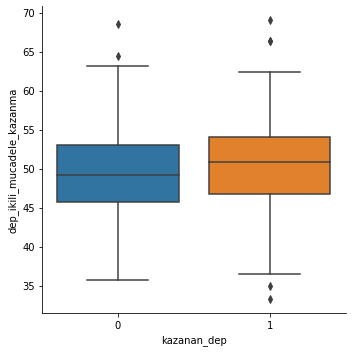

In [24]:
#deplasman takımının ikili mücadele basarı oranının kazanmasındaki etkisi (1 ise kazanmış 0 ise kaybetmiş)
sns.catplot(x="kazanan_dep", y="dep_ikili_mucadele_kazanma", kind="box",data=df3)

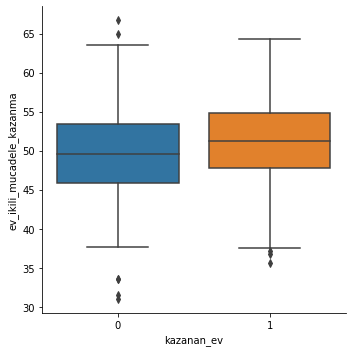

In [25]:
#ev takımlarının ikili mücadele basarı oranının kazanmasındaki etkisi (1 ise kazanmış 0 ise kaybetmiş)
sns.catplot(x="kazanan_ev", y="ev_ikili_mucadele_kazanma", kind="box",data=df3)

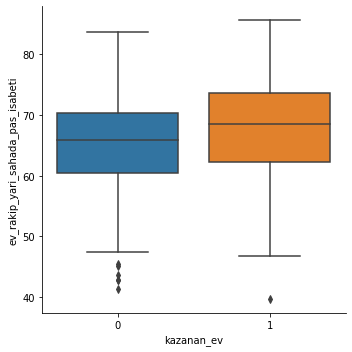

In [26]:
#ev takımlarının rakip yari sahadaki pas isabetinin maçı kazanmasındaki etkisi. Kazandığı(=1) zamandaki rakip yari sahadaki pas isabeti kaybettiğinden(=0) fazla 
sns.catplot(x="kazanan_ev", y="ev_rakip_yari_sahada_pas_isabeti", kind="box",data=df3)

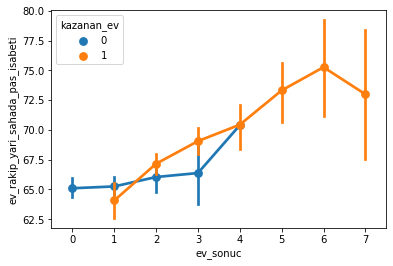

In [27]:
#ev takımlarının rakip yarı sahadaki pas isabetinin gol sayısıyla ilişkisi ve aynı zamanda ev sahibinin kazanma ve kaybetme grafiği
sns.pointplot(x="ev_sonuc", y="ev_rakip_yari_sahada_pas_isabeti", hue="kazanan_ev", data=df3);

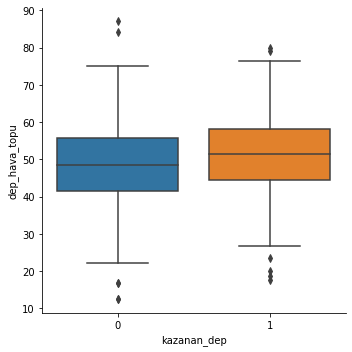

In [28]:
#Daha çok hava topu kazanan takımların maçı kazanma şansı biraz daha yüksek gibi yorum yapılabilir.
sns.catplot(x="kazanan_dep", y="dep_hava_topu", kind="box",data=df3)

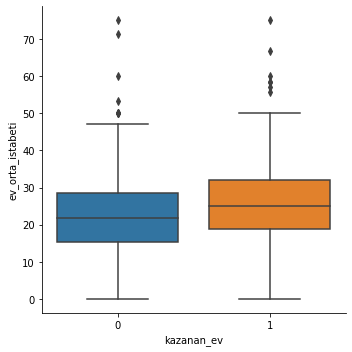

In [29]:
#ev orta isabetinin maçı kazanmasındaki etkisi
sns.catplot(x="kazanan_ev", y="ev_orta_istabeti", kind="box",data=df3)

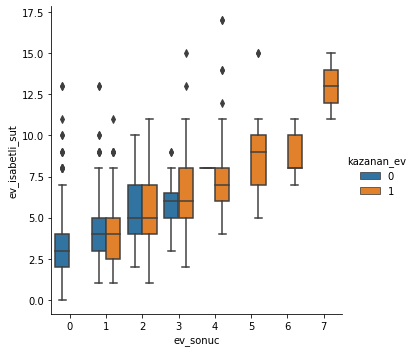

In [30]:
#evin isabetli şutu arttıkça gol sayısıda artıyor doğal olarak
sns.catplot(x="ev_sonuc", y="ev_isabetli_sut", hue="kazanan_ev", kind="box", data=df3)